In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
NUM_CLASSES = 10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0   

In [7]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
model.fit(x_train
          , y_train
          , batch_size=64
          , epochs=20
          , shuffle=True
          , validation_data = (x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 249us/step - loss: 1.5944 - acc: 0.4426 - val_loss: 1.2508 - val_acc: 0.5523
Epoch 2/20
50000/50000 [==============================] - 10s 192us/step - loss: 1.1895 - acc: 0.5804 - val_loss: 1.0956 - val_acc: 0.6128
Epoch 3/20
50000/50000 [==============================] - 9s 190us/step - loss: 1.0310 - acc: 0.6376 - val_loss: 0.9851 - val_acc: 0.6519
Epoch 4/20
50000/50000 [==============================] - 9s 189us/step - loss: 0.9311 - acc: 0.6750 - val_loss: 0.9241 - val_acc: 0.6808
Epoch 5/20
50000/50000 [==============================] - 10s 190us/step - loss: 0.8635 - acc: 0.6975 - val_loss: 1.0490 - val_acc: 0.6393
Epoch 6/20
50000/50000 [==============================] - 9s 189us/step - loss: 0.8110 - acc: 0.7152 - val_loss: 0.8661 - val_acc: 0.7000
Epoch 7/20
50000/50000 [=

In [9]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 1s 61us/step


[0.9878109693527222, 0.699099999666214]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

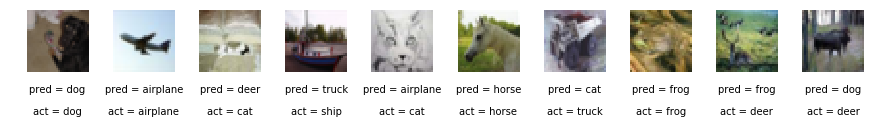

In [11]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [0]:
from keras.applications.vgg16 import VGG16

In [13]:
vgg16_model = VGG16()

In [14]:
type(vgg16_model)

keras.engine.training.Model

In [15]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
vgg16_model.layers.pop()

In [0]:
from keras.models import Sequential

In [0]:
model_seq = Sequential()
for i in vgg16_model.layers:
  model_seq.add(i)


In [19]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [20]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model_seq.layers:
  layer.trainable = False

In [0]:
model_seq.add(Dense(2, activation='softmax'))

In [23]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
opt = Adam(lr=0.0005)
model_seq.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
model.fit(x_train
          , y_train
          , batch_size=64
          , epochs=20
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 195us/step - loss: 0.3921 - acc: 0.8600 - val_loss: 0.9900 - val_acc: 0.7101
Epoch 2/20
50000/50000 [==============================] - 10s 191us/step - loss: 0.3812 - acc: 0.8635 - val_loss: 0.9675 - val_acc: 0.7160
Epoch 3/20
50000/50000 [==============================] - 9s 188us/step - loss: 0.3636 - acc: 0.8695 - val_loss: 1.0320 - val_acc: 0.7011
Epoch 4/20
50000/50000 [==============================] - 9s 190us/step - loss: 0.3509 - acc: 0.8722 - val_loss: 0.9849 - val_acc: 0.7188
Epoch 5/20
50000/50000 [==============================] - 9s 189us/step - loss: 0.3367 - acc: 0.8794 - val_loss: 1.1099 - val_acc: 0.6888
Epoch 6/20
50000/50000 [==============================] - 10s 191us/step - loss: 0.3285 - acc: 0.8817 - val_loss: 1.0103 - val_acc: 0.7165
Epoch 7/20
50000/50000 [==============================] - 9s 189us/step - loss: 0.3124 - acc: 0.8879 - val_loss: 1.0514

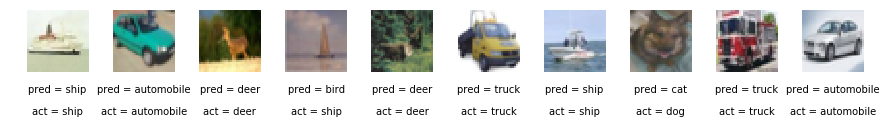

In [26]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [0]:
modelApi_wts = model.get_weights()
modelSeq_wts = model_seq.get_weights()

In [0]:
import yaml
import h5py

In [0]:
model_yaml = model.to_yaml()

In [32]:
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [33]:
model_yaml = model_seq.to_yaml()
with open("model_seq.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model_seq.h5")
print("Saved model to disk")

Saved model to disk
